# 방법 1 - 직접 상한/하한 화소값을 탐색하는 방법

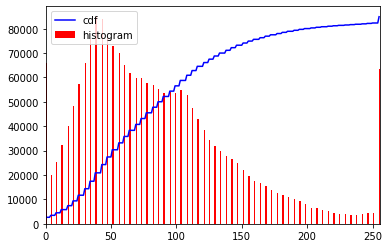

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def percentile_stretching(img, p_low, p_high):
    '''
    percentile stretching 함수
    
    Parameters
    ----------
    p_low: int (0~100)
        percentile stretching을 수행하기 위한 하위 백분율
    p_high: int (0~100)
        percentile stretching을 수행하기 위한 상위 백분율
    
    Returns
    -------
    img_ptile: array
        percentile stretching 처리된 이미지 배열
    
    '''
    # 누적 히스토그램 계산
    hist, _ = np.histogram(img, 256, [0,256]) # 리턴값 중 bins는 사용하지 않음
    cdf = hist.cumsum()

    # p_low 및 p_high 백분위에 해당하는 누적 히스토그램 값 계산
    hist_low = cdf[-1]/100*p_low    # 누적 히스토그램의 마지막 열 값 == 영상의 전체 픽셀 개수
    hist_high = cdf[-1]/100*p_high

    # 히스토그램에서 하한에 해당하는 화소값 탐색
    o_min = 255
    for i in range(256):
        if cdf[i] > hist_low:
            o_min = i
            break

    # 히스토그램에서 상한에 해당하는 화소값 탐색
    o_max = 0
    for i in range(255,-1,-1): # 255부터 0까지 역순으로 순회
        if cdf[i] < hist_high:
            o_max = i+1
            break

    # min,max값을 기준으로 0~255 값으로 정규화 (img 배열의 overflow 발생을 방지하기 위해 데이터 타입을 float으로 변환)
    img_ptile = (img.astype('float32') - o_min) / (o_max - o_min) * 255.0

    # 영상의 화소값을 0~255 범위로 맞춤 (0보다 작으면 0으로, 255보다 크면 255로)
    img_ptile[img_ptile < 0] = 0
    img_ptile[img_ptile > 255] = 255.0
    
    img_ptile = img_ptile.astype('uint8')  # 현재 img_tile 배열의 데이터 타입이 float이므로 uint8로 변환해 줌
    
    return img_ptile
    

# 이미지 파일 읽어오기
img = cv2.imread('landscape.jpg')

# percentile stretching 수행하기
img_percentile = percentile_stretching(img, 3, 97)

# 히스토그램 생성하기
hist, bins = np.histogram(img_percentile, 256, [0,256])

# 정규화된 누적 히스토그램 생성하기
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()

# 히스토그램 시각화하기
plt.plot(cdf_normalized, color='b')
plt.hist(img_percentile.flatten(), 256, [0,256], color='r')
plt.xlim([0,256])
plt.legend(['cdf', 'histogram'], loc='upper left')
plt.show()

# 이미지 창 띄우기
cv2.imshow('image', img_percentile)
cv2.waitKey()

cv2.destroyAllWindows()

# 방법 2 - Numpy 함수를 활용하는 방법

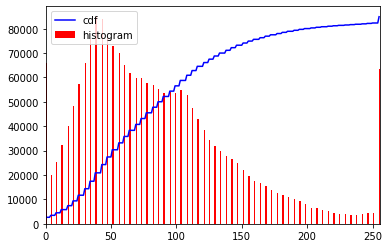

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def percentile_stretching(img, p_low, p_high):
    '''
    percentile stretching 함수
    
    Parameters
    ----------
    p_low: int (0~100)
        percentile stretching을 수행하기 위한 하위 백분율
    p_high: int (0~100)
        percentile stretching을 수행하기 위한 상위 백분율
    
    Returns
    -------
    img_ptile: array
        percentile stretching 처리된 이미지 배열
    
    '''
    # np.percentile()을 사용하여 min, max 화소값 계산
    o_min = np.percentile(img, p_low)
    o_max = np.percentile(img, p_high)
    
    img_ptile = (img - o_min) / float(o_max - o_min) * 255.0    # min,max값을 기준으로 0~255 값으로 정규화
    img_ptile = np.clip(img_ptile, 0, 255)    # 영상의 화소값을 0~255 범위로 맞춤 (0보다 작으면 0으로, 255보다 크면 255로)

    img_ptile = img_ptile.astype('uint8')  # 현재 img_tile 배열의 데이터 타입이 float이므로 uint8로 변환해 줌
    
    return img_ptile
    

# 이미지 파일 읽어오기
img = cv2.imread('landscape.jpg')

# percentile stretching 수행하기
img_percentile = percentile_stretching(img, 3, 97)

# 히스토그램 생성하기
hist, bins = np.histogram(img_percentile, 256, [0,256])

# 정규화된 누적 히스토그램 생성하기
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()

# 히스토그램 시각화하기
plt.plot(cdf_normalized, color='b')
plt.hist(img_percentile.flatten(), 256, [0,256], color='r')
plt.xlim([0,256])
plt.legend(['cdf', 'histogram'], loc='upper left')
plt.show()

# 이미지 창 띄우기
cv2.imshow('image', img_percentile)
cv2.waitKey()

cv2.destroyAllWindows()